# simple RNN
### バイナリ加算

iters:0
Loss:2.0323279525045748
67 + 77 = 254
------------
iters:100
Loss:0.9885616843804432
6 + 70 = 0
------------
iters:200
Loss:1.0123974602187251
50 + 89 = 0
------------
iters:300
Loss:1.012632943421217
111 + 123 = 246
------------
iters:400
Loss:0.931473739887902
1 + 103 = 70
------------
iters:500
Loss:0.831982498200354
102 + 89 = 158
------------
iters:600
Loss:1.0833490662709728
69 + 15 = 10
------------
iters:700
Loss:0.8839624856489039
11 + 17 = 0
------------
iters:800
Loss:1.2546261491800943
49 + 77 = 0
------------
iters:900
Loss:0.7576266194792577
19 + 24 = 47
------------
iters:1000
Loss:0.8794578976354558
44 + 8 = 245
------------
iters:1100
Loss:0.7509784075287543
69 + 81 = 146
------------
iters:1200
Loss:0.9982934328556997
111 + 116 = 255
------------
iters:1300
Loss:0.6520660420524846
90 + 83 = 165
------------
iters:1400
Loss:0.9164131162142709
22 + 34 = 117
------------
iters:1500
Loss:0.5732589256374983
23 + 100 = 123
------------
iters:1600
Loss:0.747025183789

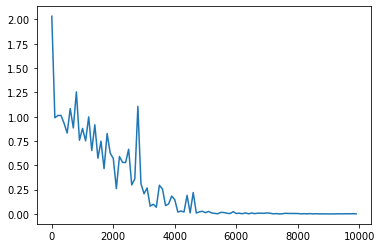

In [14]:
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
from common import functions
import matplotlib.pyplot as plt

# def d_tanh(x):



# データを用意
# 2進数の桁数
binary_dim = 8
# 最大値 + 1
largest_number = pow(2, binary_dim)
# largest_numberまで2進数を用意
binary = np.unpackbits(np.array([range(largest_number)],dtype=np.uint8).T,axis=1)

input_layer_size = 2
hidden_layer_size = 16
output_layer_size = 1

weight_init_std = 1
learning_rate = 0.1

iters_num = 10000
plot_interval = 100

# ウェイト初期化 (バイアスは簡単のため省略)
W_in = weight_init_std * np.random.randn(input_layer_size, hidden_layer_size)
W_out = weight_init_std * np.random.randn(hidden_layer_size, output_layer_size)
W = weight_init_std * np.random.randn(hidden_layer_size, hidden_layer_size)

# Xavier


# He



# 勾配
W_in_grad = np.zeros_like(W_in)
W_out_grad = np.zeros_like(W_out)
W_grad = np.zeros_like(W)

u = np.zeros((hidden_layer_size, binary_dim + 1))
z = np.zeros((hidden_layer_size, binary_dim + 1))
y = np.zeros((output_layer_size, binary_dim))

delta_out = np.zeros((output_layer_size, binary_dim))
delta = np.zeros((hidden_layer_size, binary_dim + 1))

all_losses = []

for i in range(iters_num):
    
    # A, B初期化 (a + b = d)
    a_int = np.random.randint(largest_number/2)
    a_bin = binary[a_int] # binary encoding
    b_int = np.random.randint(largest_number/2)
    b_bin = binary[b_int] # binary encoding
    
    # 正解データ
    d_int = a_int + b_int
    d_bin = binary[d_int]
    
    # 出力バイナリ
    out_bin = np.zeros_like(d_bin)
    
    # 時系列全体の誤差
    all_loss = 0    
    
    # 時系列ループ
    for t in range(binary_dim):
        # 入力値
        X = np.array([a_bin[ - t - 1], b_bin[ - t - 1]]).reshape(1, -1)
        # 時刻tにおける正解データ
        dd = np.array([d_bin[binary_dim - t - 1]])
        
        u[:,t+1] = np.dot(X, W_in) + np.dot(z[:,t].reshape(1, -1), W)
        z[:,t+1] = functions.sigmoid(u[:,t+1])

        y[:,t] = functions.sigmoid(np.dot(z[:,t+1].reshape(1, -1), W_out))


        #誤差
        loss = functions.mean_squared_error(dd, y[:,t])
        
        delta_out[:,t] = functions.d_mean_squared_error(dd, y[:,t]) * functions.d_sigmoid(y[:,t])        
        
        all_loss += loss

        out_bin[binary_dim - t - 1] = np.round(y[:,t])
    
    
    for t in range(binary_dim)[::-1]:
        X = np.array([a_bin[-t-1],b_bin[-t-1]]).reshape(1, -1)        

        delta[:,t] = (np.dot(delta[:,t+1].T, W.T) + np.dot(delta_out[:,t].T, W_out.T)) * functions.d_sigmoid(u[:,t+1])

        # 勾配更新
        W_out_grad += np.dot(z[:,t+1].reshape(-1,1), delta_out[:,t].reshape(-1,1))
        W_grad += np.dot(z[:,t].reshape(-1,1), delta[:,t].reshape(1,-1))
        W_in_grad += np.dot(X.T, delta[:,t].reshape(1,-1))
    
    # 勾配適用
    W_in -= learning_rate * W_in_grad
    W_out -= learning_rate * W_out_grad
    W -= learning_rate * W_grad
    
    W_in_grad *= 0
    W_out_grad *= 0
    W_grad *= 0
    

    if(i % plot_interval == 0):
        all_losses.append(all_loss)        
        print("iters:" + str(i))
        print("Loss:" + str(all_loss))
        #print("Pred:" + str(out_bin))
        #print("True:" + str(d_bin))
        out_int = 0
        for index,x in enumerate(reversed(out_bin)):
            out_int += x * pow(2, index)
        print(str(a_int) + " + " + str(b_int) + " = " + str(out_int))
        print("------------")

lists = range(0, iters_num, plot_interval)
plt.plot(lists, all_losses, label="loss")
plt.show()

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
## [try] weight_init_stdやlearning_rate, hidden_layer_sizeを変更してみよう

iters:0
Loss:0.9487746190228646
71 + 33 = 0
------------
iters:100
Loss:1.0799720936506527
90 + 121 = 0
------------
iters:200
Loss:1.0433147687581674
72 + 99 = 144
------------
iters:300
Loss:1.0688241397221037
87 + 125 = 171
------------
iters:400
Loss:0.9654765328005112
60 + 99 = 255
------------
iters:500
Loss:1.0038111270535723
55 + 1 = 106
------------
iters:600
Loss:1.0520448754942375
54 + 98 = 65
------------
iters:700
Loss:1.067059797148323
72 + 111 = 0
------------
iters:800
Loss:1.085605869603572
121 + 50 = 0
------------
iters:900
Loss:0.9350177057557731
17 + 50 = 34
------------
iters:1000
Loss:1.129470624758349
91 + 17 = 18
------------
iters:1100
Loss:1.0392491639858514
71 + 90 = 142
------------
iters:1200
Loss:0.9327934505150124
36 + 33 = 75
------------
iters:1300
Loss:0.9774038176885134
121 + 25 = 251
------------
iters:1400
Loss:1.1227731641091117
82 + 46 = 191
------------
iters:1500
Loss:0.9245738926738081
42 + 61 = 87
------------
iters:1600
Loss:0.93114692458795

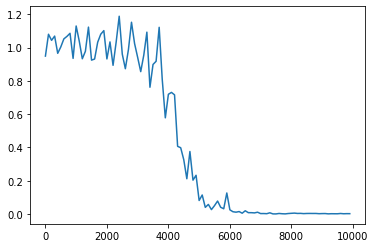

In [19]:
#weight_init_std = 1
weight_init_std = 0.5
learning_rate = 0.1
hidden_layer_size = 16


import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
from common import functions
import matplotlib.pyplot as plt

# def d_tanh(x):



# データを用意
# 2進数の桁数
binary_dim = 8
# 最大値 + 1
largest_number = pow(2, binary_dim)
# largest_numberまで2進数を用意
binary = np.unpackbits(np.array([range(largest_number)],dtype=np.uint8).T,axis=1)

input_layer_size = 2

output_layer_size = 1



iters_num = 10000
plot_interval = 100

# ウェイト初期化 (バイアスは簡単のため省略)
W_in = weight_init_std * np.random.randn(input_layer_size, hidden_layer_size)
W_out = weight_init_std * np.random.randn(hidden_layer_size, output_layer_size)
W = weight_init_std * np.random.randn(hidden_layer_size, hidden_layer_size)

# Xavier


# He



# 勾配
W_in_grad = np.zeros_like(W_in)
W_out_grad = np.zeros_like(W_out)
W_grad = np.zeros_like(W)

u = np.zeros((hidden_layer_size, binary_dim + 1))
z = np.zeros((hidden_layer_size, binary_dim + 1))
y = np.zeros((output_layer_size, binary_dim))

delta_out = np.zeros((output_layer_size, binary_dim))
delta = np.zeros((hidden_layer_size, binary_dim + 1))

all_losses = []

for i in range(iters_num):
    
    # A, B初期化 (a + b = d)
    a_int = np.random.randint(largest_number/2)
    a_bin = binary[a_int] # binary encoding
    b_int = np.random.randint(largest_number/2)
    b_bin = binary[b_int] # binary encoding
    
    # 正解データ
    d_int = a_int + b_int
    d_bin = binary[d_int]
    
    # 出力バイナリ
    out_bin = np.zeros_like(d_bin)
    
    # 時系列全体の誤差
    all_loss = 0    
    
    # 時系列ループ
    for t in range(binary_dim):
        # 入力値
        X = np.array([a_bin[ - t - 1], b_bin[ - t - 1]]).reshape(1, -1)
        # 時刻tにおける正解データ
        dd = np.array([d_bin[binary_dim - t - 1]])
        
        u[:,t+1] = np.dot(X, W_in) + np.dot(z[:,t].reshape(1, -1), W)
        z[:,t+1] = functions.sigmoid(u[:,t+1])

        y[:,t] = functions.sigmoid(np.dot(z[:,t+1].reshape(1, -1), W_out))


        #誤差
        loss = functions.mean_squared_error(dd, y[:,t])
        
        delta_out[:,t] = functions.d_mean_squared_error(dd, y[:,t]) * functions.d_sigmoid(y[:,t])        
        
        all_loss += loss

        out_bin[binary_dim - t - 1] = np.round(y[:,t])
    
    
    for t in range(binary_dim)[::-1]:
        X = np.array([a_bin[-t-1],b_bin[-t-1]]).reshape(1, -1)        

        delta[:,t] = (np.dot(delta[:,t+1].T, W.T) + np.dot(delta_out[:,t].T, W_out.T)) * functions.d_sigmoid(u[:,t+1])

        # 勾配更新
        W_out_grad += np.dot(z[:,t+1].reshape(-1,1), delta_out[:,t].reshape(-1,1))
        W_grad += np.dot(z[:,t].reshape(-1,1), delta[:,t].reshape(1,-1))
        W_in_grad += np.dot(X.T, delta[:,t].reshape(1,-1))
    
    # 勾配適用
    W_in -= learning_rate * W_in_grad
    W_out -= learning_rate * W_out_grad
    W -= learning_rate * W_grad
    
    W_in_grad *= 0
    W_out_grad *= 0
    W_grad *= 0
    

    if(i % plot_interval == 0):
        all_losses.append(all_loss)        
        print("iters:" + str(i))
        print("Loss:" + str(all_loss))
        #print("Pred:" + str(out_bin))
        #print("True:" + str(d_bin))
        out_int = 0
        for index,x in enumerate(reversed(out_bin)):
            out_int += x * pow(2, index)
        print(str(a_int) + " + " + str(b_int) + " = " + str(out_int))
        print("------------")

lists = range(0, iters_num, plot_interval)
plt.plot(lists, all_losses, label="loss")
plt.show()

iters:0
Loss:2.1500297623569873
Pred:[1 1 1 1 1 1 1 1]
True:[1 0 1 0 0 0 0 0]
84 + 76 = 255
------------
iters:100
Loss:0.9795895331229871
Pred:[1 1 1 1 1 1 1 1]
True:[1 1 0 0 0 1 1 0]
99 + 99 = 255
------------
iters:200
Loss:1.0148756330101
Pred:[0 1 0 1 1 1 1 1]
True:[0 0 1 1 0 0 1 1]
43 + 8 = 95
------------
iters:300
Loss:0.8719844299776484
Pred:[1 1 1 1 0 1 1 1]
True:[1 0 1 1 0 0 1 1]
98 + 81 = 247
------------
iters:400
Loss:1.1094311761418978
Pred:[0 1 0 0 0 0 0 0]
True:[1 0 0 1 1 0 1 0]
106 + 48 = 64
------------
iters:500
Loss:1.2204484833974172
Pred:[0 0 0 0 0 0 0 0]
True:[0 1 0 0 1 0 1 1]
17 + 58 = 0
------------
iters:600
Loss:0.6122277258109237
Pred:[0 1 0 0 1 1 1 1]
True:[1 0 0 0 1 1 1 1]
76 + 67 = 79
------------
iters:700
Loss:0.9532786216031006
Pred:[0 0 0 1 1 0 0 1]
True:[1 0 1 0 0 0 0 1]
124 + 37 = 25
------------
iters:800
Loss:0.3930581173916042
Pred:[0 0 0 1 0 1 1 0]
True:[0 0 0 1 0 1 1 0]
6 + 16 = 22
------------
iters:900
Loss:0.3975992726521146
Pred:[1 0 0 1 0

iters:7700
Loss:0.00015945524793275763
Pred:[0 0 1 0 0 0 0 1]
True:[0 0 1 0 0 0 0 1]
22 + 11 = 33
------------
iters:7800
Loss:0.0001833117342410179
Pred:[1 0 1 0 0 0 1 1]
True:[1 0 1 0 0 0 1 1]
122 + 41 = 163
------------
iters:7900
Loss:0.00011148674233797373
Pred:[0 1 0 1 0 0 1 1]
True:[0 1 0 1 0 0 1 1]
53 + 30 = 83
------------
iters:8000
Loss:8.718556659183993e-05
Pred:[0 1 1 1 1 1 1 0]
True:[0 1 1 1 1 1 1 0]
111 + 15 = 126
------------
iters:8100
Loss:6.753680774431943e-05
Pred:[1 0 0 1 1 1 1 1]
True:[1 0 0 1 1 1 1 1]
38 + 121 = 159
------------
iters:8200
Loss:2.263986309990671e-05
Pred:[1 0 1 1 0 1 0 1]
True:[1 0 1 1 0 1 0 1]
105 + 76 = 181
------------
iters:8300
Loss:7.238815735600445e-05
Pred:[0 0 1 1 0 0 1 1]
True:[0 0 1 1 0 0 1 1]
1 + 50 = 51
------------
iters:8400
Loss:7.708759121299103e-05
Pred:[1 0 0 1 1 0 0 0]
True:[1 0 0 1 1 0 0 0]
48 + 104 = 152
------------
iters:8500
Loss:7.197218534489126e-05
Pred:[0 0 1 0 0 1 0 0]
True:[0 0 1 0 0 1 0 0]
20 + 16 = 36
------------

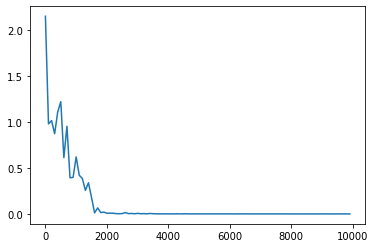

In [20]:
weight_init_std = 1
#learning_rate = 0.1
learning_rate = 0.5
hidden_layer_size = 16


import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
from common import functions
import matplotlib.pyplot as plt

# def d_tanh(x):



# データを用意
# 2進数の桁数
binary_dim = 8
# 最大値 + 1
largest_number = pow(2, binary_dim)
# largest_numberまで2進数を用意
binary = np.unpackbits(np.array([range(largest_number)],dtype=np.uint8).T,axis=1)

input_layer_size = 2

output_layer_size = 1



iters_num = 10000
plot_interval = 100

# ウェイト初期化 (バイアスは簡単のため省略)
W_in = weight_init_std * np.random.randn(input_layer_size, hidden_layer_size)
W_out = weight_init_std * np.random.randn(hidden_layer_size, output_layer_size)
W = weight_init_std * np.random.randn(hidden_layer_size, hidden_layer_size)

# Xavier


# He



# 勾配
W_in_grad = np.zeros_like(W_in)
W_out_grad = np.zeros_like(W_out)
W_grad = np.zeros_like(W)

u = np.zeros((hidden_layer_size, binary_dim + 1))
z = np.zeros((hidden_layer_size, binary_dim + 1))
y = np.zeros((output_layer_size, binary_dim))

delta_out = np.zeros((output_layer_size, binary_dim))
delta = np.zeros((hidden_layer_size, binary_dim + 1))

all_losses = []

for i in range(iters_num):
    
    # A, B初期化 (a + b = d)
    a_int = np.random.randint(largest_number/2)
    a_bin = binary[a_int] # binary encoding
    b_int = np.random.randint(largest_number/2)
    b_bin = binary[b_int] # binary encoding
    
    # 正解データ
    d_int = a_int + b_int
    d_bin = binary[d_int]
    
    # 出力バイナリ
    out_bin = np.zeros_like(d_bin)
    
    # 時系列全体の誤差
    all_loss = 0    
    
    # 時系列ループ
    for t in range(binary_dim):
        # 入力値
        X = np.array([a_bin[ - t - 1], b_bin[ - t - 1]]).reshape(1, -1)
        # 時刻tにおける正解データ
        dd = np.array([d_bin[binary_dim - t - 1]])
        
        u[:,t+1] = np.dot(X, W_in) + np.dot(z[:,t].reshape(1, -1), W)
        z[:,t+1] = functions.sigmoid(u[:,t+1])

        y[:,t] = functions.sigmoid(np.dot(z[:,t+1].reshape(1, -1), W_out))


        #誤差
        loss = functions.mean_squared_error(dd, y[:,t])
        
        delta_out[:,t] = functions.d_mean_squared_error(dd, y[:,t]) * functions.d_sigmoid(y[:,t])        
        
        all_loss += loss

        out_bin[binary_dim - t - 1] = np.round(y[:,t])
    
    
    for t in range(binary_dim)[::-1]:
        X = np.array([a_bin[-t-1],b_bin[-t-1]]).reshape(1, -1)        

        delta[:,t] = (np.dot(delta[:,t+1].T, W.T) + np.dot(delta_out[:,t].T, W_out.T)) * functions.d_sigmoid(u[:,t+1])

        # 勾配更新
        W_out_grad += np.dot(z[:,t+1].reshape(-1,1), delta_out[:,t].reshape(-1,1))
        W_grad += np.dot(z[:,t].reshape(-1,1), delta[:,t].reshape(1,-1))
        W_in_grad += np.dot(X.T, delta[:,t].reshape(1,-1))
    
    # 勾配適用
    W_in -= learning_rate * W_in_grad
    W_out -= learning_rate * W_out_grad
    W -= learning_rate * W_grad
    
    W_in_grad *= 0
    W_out_grad *= 0
    W_grad *= 0
    

    if(i % plot_interval == 0):
        all_losses.append(all_loss)        
        print("iters:" + str(i))
        print("Loss:" + str(all_loss))
        print("Pred:" + str(out_bin))
        print("True:" + str(d_bin))
        out_int = 0
        for index,x in enumerate(reversed(out_bin)):
            out_int += x * pow(2, index)
        print(str(a_int) + " + " + str(b_int) + " = " + str(out_int))
        print("------------")

lists = range(0, iters_num, plot_interval)
plt.plot(lists, all_losses, label="loss")
plt.show()

iters:0
Loss:1.802787337280182
Pred:[1 1 1 1 1 1 1 1]
True:[1 0 0 1 1 0 0 0]
63 + 89 = 255
------------
iters:100
Loss:0.9596042466176956
Pred:[0 0 0 0 0 0 0 0]
True:[0 1 1 0 1 1 0 0]
100 + 8 = 0
------------
iters:200
Loss:0.9327248018259972
Pred:[1 1 0 1 1 1 1 0]
True:[1 1 0 0 1 1 1 0]
92 + 114 = 222
------------
iters:300
Loss:0.8893105506638848
Pred:[0 0 0 0 0 0 1 0]
True:[1 0 0 0 1 1 1 0]
93 + 49 = 2
------------
iters:400
Loss:0.9073354346059719
Pred:[0 0 0 0 0 0 0 1]
True:[0 0 1 0 0 1 1 1]
10 + 29 = 1
------------
iters:500
Loss:1.0425940507288112
Pred:[0 0 1 0 0 1 0 0]
True:[1 0 0 0 1 0 0 1]
79 + 58 = 36
------------
iters:600
Loss:0.719711311080995
Pred:[1 1 1 1 1 1 0 0]
True:[0 1 1 1 1 0 0 0]
20 + 100 = 252
------------
iters:700
Loss:1.193918110515613
Pred:[0 0 0 1 0 1 0 0]
True:[0 1 1 1 1 0 1 1]
43 + 80 = 20
------------
iters:800
Loss:1.2344859683266796
Pred:[0 0 1 1 1 1 0 0]
True:[0 0 1 0 0 0 0 0]
12 + 20 = 60
------------
iters:900
Loss:0.6213221767792295
Pred:[0 0 0 0 1

iters:7700
Loss:0.001428811545048208
Pred:[1 0 0 0 1 0 0 1]
True:[1 0 0 0 1 0 0 1]
82 + 55 = 137
------------
iters:7800
Loss:0.0013349254378473218
Pred:[0 1 1 0 1 0 1 1]
True:[0 1 1 0 1 0 1 1]
29 + 78 = 107
------------
iters:7900
Loss:0.001235510054415098
Pred:[1 1 0 1 1 1 1 1]
True:[1 1 0 1 1 1 1 1]
101 + 122 = 223
------------
iters:8000
Loss:0.0013845415894443139
Pred:[0 0 0 1 1 0 1 0]
True:[0 0 0 1 1 0 1 0]
14 + 12 = 26
------------
iters:8100
Loss:0.00136186908964137
Pred:[1 0 0 1 1 0 1 0]
True:[1 0 0 1 1 0 1 0]
34 + 120 = 154
------------
iters:8200
Loss:0.0011536233330507587
Pred:[1 1 0 0 0 1 0 1]
True:[1 1 0 0 0 1 0 1]
115 + 82 = 197
------------
iters:8300
Loss:0.0007111712527599072
Pred:[0 1 1 1 1 1 0 0]
True:[0 1 1 1 1 1 0 0]
101 + 23 = 124
------------
iters:8400
Loss:0.0010150303812936244
Pred:[1 1 1 0 1 1 0 1]
True:[1 1 1 0 1 1 0 1]
117 + 120 = 237
------------
iters:8500
Loss:0.0005041007433704376
Pred:[1 0 1 1 0 1 0 0]
True:[1 0 1 1 0 1 0 0]
83 + 97 = 180
------------

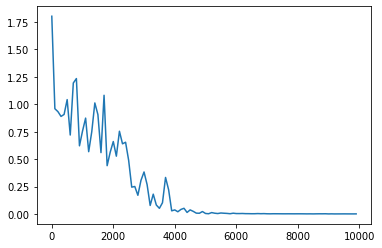

In [5]:
weight_init_std = 1
learning_rate = 0.1
#hidden_layer_size = 16
hidden_layer_size = 32


import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
from common import functions
import matplotlib.pyplot as plt

# def d_tanh(x):



# データを用意
# 2進数の桁数
binary_dim = 8
# 最大値 + 1
largest_number = pow(2, binary_dim)
# largest_numberまで2進数を用意
binary = np.unpackbits(np.array([range(largest_number)],dtype=np.uint8).T,axis=1)

input_layer_size = 2

output_layer_size = 1



iters_num = 10000
plot_interval = 100

# ウェイト初期化 (バイアスは簡単のため省略)
W_in = weight_init_std * np.random.randn(input_layer_size, hidden_layer_size)
W_out = weight_init_std * np.random.randn(hidden_layer_size, output_layer_size)
W = weight_init_std * np.random.randn(hidden_layer_size, hidden_layer_size)

# Xavier


# He



# 勾配
W_in_grad = np.zeros_like(W_in)
W_out_grad = np.zeros_like(W_out)
W_grad = np.zeros_like(W)

u = np.zeros((hidden_layer_size, binary_dim + 1))
z = np.zeros((hidden_layer_size, binary_dim + 1))
y = np.zeros((output_layer_size, binary_dim))

delta_out = np.zeros((output_layer_size, binary_dim))
delta = np.zeros((hidden_layer_size, binary_dim + 1))

all_losses = []

for i in range(iters_num):
    
    # A, B初期化 (a + b = d)
    a_int = np.random.randint(largest_number/2)
    a_bin = binary[a_int] # binary encoding
    b_int = np.random.randint(largest_number/2)
    b_bin = binary[b_int] # binary encoding
    
    # 正解データ
    d_int = a_int + b_int
    d_bin = binary[d_int]
    
    # 出力バイナリ
    out_bin = np.zeros_like(d_bin)
    
    # 時系列全体の誤差
    all_loss = 0    
    
    # 時系列ループ
    for t in range(binary_dim):
        # 入力値
        X = np.array([a_bin[ - t - 1], b_bin[ - t - 1]]).reshape(1, -1)
        # 時刻tにおける正解データ
        dd = np.array([d_bin[binary_dim - t - 1]])
        
        u[:,t+1] = np.dot(X, W_in) + np.dot(z[:,t].reshape(1, -1), W)
        z[:,t+1] = functions.sigmoid(u[:,t+1])

        y[:,t] = functions.sigmoid(np.dot(z[:,t+1].reshape(1, -1), W_out))


        #誤差
        loss = functions.mean_squared_error(dd, y[:,t])
        
        delta_out[:,t] = functions.d_mean_squared_error(dd, y[:,t]) * functions.d_sigmoid(y[:,t])        
        
        all_loss += loss

        out_bin[binary_dim - t - 1] = np.round(y[:,t])
    
    
    for t in range(binary_dim)[::-1]:
        X = np.array([a_bin[-t-1],b_bin[-t-1]]).reshape(1, -1)        

        delta[:,t] = (np.dot(delta[:,t+1].T, W.T) + np.dot(delta_out[:,t].T, W_out.T)) * functions.d_sigmoid(u[:,t+1])

        # 勾配更新
        W_out_grad += np.dot(z[:,t+1].reshape(-1,1), delta_out[:,t].reshape(-1,1))
        W_grad += np.dot(z[:,t].reshape(-1,1), delta[:,t].reshape(1,-1))
        W_in_grad += np.dot(X.T, delta[:,t].reshape(1,-1))
    
    # 勾配適用
    W_in -= learning_rate * W_in_grad
    W_out -= learning_rate * W_out_grad
    W -= learning_rate * W_grad
    
    W_in_grad *= 0
    W_out_grad *= 0
    W_grad *= 0
    

    if(i % plot_interval == 0):
        all_losses.append(all_loss)        
        print("iters:" + str(i))
        print("Loss:" + str(all_loss))
        print("Pred:" + str(out_bin))
        print("True:" + str(d_bin))
        out_int = 0
        for index,x in enumerate(reversed(out_bin)):
            out_int += x * pow(2, index)
        print(str(a_int) + " + " + str(b_int) + " = " + str(out_int))
        print("------------")

lists = range(0, iters_num, plot_interval)
plt.plot(lists, all_losses, label="loss")
plt.show()

## [try] 重みの初期化方法を変更してみよう
### Xavier

iters:0
Loss:1.0151593481652201
Pred:[0 0 0 0 0 0 0 0]
True:[1 0 0 0 0 1 1 0]
102 + 32 = 0
------------
iters:100
Loss:1.0098215738866982
Pred:[0 0 0 0 0 0 0 0]
True:[1 0 1 0 1 0 0 1]
115 + 54 = 0
------------
iters:200
Loss:1.0071820091541852
Pred:[1 1 0 1 1 1 1 0]
True:[1 0 0 1 0 1 0 1]
100 + 49 = 222
------------
iters:300
Loss:1.0014031551666782
Pred:[1 1 1 1 1 1 1 0]
True:[0 1 0 0 0 1 1 0]
38 + 32 = 254
------------
iters:400
Loss:1.026012723129032
Pred:[0 1 1 1 1 1 1 0]
True:[1 1 0 1 0 0 0 1]
123 + 86 = 126
------------
iters:500
Loss:0.9464635637261729
Pred:[0 1 1 1 0 1 0 0]
True:[0 1 1 1 0 1 0 1]
81 + 36 = 116
------------
iters:600
Loss:1.0294750337299687
Pred:[0 1 1 0 1 0 1 0]
True:[1 0 1 1 1 0 0 0]
77 + 107 = 106
------------
iters:700
Loss:1.027629532750318
Pred:[1 1 1 1 1 1 1 1]
True:[1 1 1 0 0 0 0 0]
108 + 116 = 255
------------
iters:800
Loss:1.058078847308298
Pred:[1 1 1 1 1 1 1 1]
True:[0 1 1 1 0 0 0 0]
21 + 91 = 255
------------
iters:900
Loss:1.0026173719872802
Pred:

iters:7600
Loss:0.01167312853512532
Pred:[0 1 1 0 1 1 1 0]
True:[0 1 1 0 1 1 1 0]
8 + 102 = 110
------------
iters:7700
Loss:0.0021888140186587498
Pred:[1 1 0 1 0 0 0 1]
True:[1 1 0 1 0 0 0 1]
97 + 112 = 209
------------
iters:7800
Loss:0.0013744889841312304
Pred:[0 1 1 0 0 1 1 0]
True:[0 1 1 0 0 1 1 0]
49 + 53 = 102
------------
iters:7900
Loss:0.008575191070442448
Pred:[1 0 0 0 0 1 0 1]
True:[1 0 0 0 0 1 0 1]
108 + 25 = 133
------------
iters:8000
Loss:0.005521937181859418
Pred:[1 0 1 1 0 1 1 1]
True:[1 0 1 1 0 1 1 1]
66 + 117 = 183
------------
iters:8100
Loss:0.01345945584656152
Pred:[0 1 0 1 0 1 0 0]
True:[0 1 0 1 0 1 0 0]
78 + 6 = 84
------------
iters:8200
Loss:0.0004842770009078502
Pred:[0 1 1 1 0 1 1 0]
True:[0 1 1 1 0 1 1 0]
21 + 97 = 118
------------
iters:8300
Loss:0.003164309845996586
Pred:[0 1 1 1 0 0 0 0]
True:[0 1 1 1 0 0 0 0]
93 + 19 = 112
------------
iters:8400
Loss:0.0092583071034964
Pred:[1 0 0 0 1 1 1 1]
True:[1 0 0 0 1 1 1 1]
126 + 17 = 143
------------
iters:850

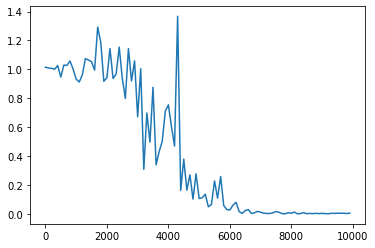

In [6]:
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
from common import functions
import matplotlib.pyplot as plt

# def d_tanh(x):



# データを用意
# 2進数の桁数
binary_dim = 8
# 最大値 + 1
largest_number = pow(2, binary_dim)
# largest_numberまで2進数を用意
binary = np.unpackbits(np.array([range(largest_number)],dtype=np.uint8).T,axis=1)

input_layer_size = 2
hidden_layer_size = 16
output_layer_size = 1

weight_init_std = 1
learning_rate = 0.1

iters_num = 10000
plot_interval = 100

# ウェイト初期化 (バイアスは簡単のため省略)
W_in = weight_init_std * np.random.randn(input_layer_size, hidden_layer_size)
W_out = weight_init_std * np.random.randn(hidden_layer_size, output_layer_size)
W = weight_init_std * np.random.randn(hidden_layer_size, hidden_layer_size)

# Xavier
W_in = np.random.randn(input_layer_size, hidden_layer_size) / (np.sqrt(input_layer_size))
W_out = np.random.randn(hidden_layer_size, output_layer_size) / (np.sqrt(hidden_layer_size))
W = np.random.randn(hidden_layer_size, hidden_layer_size) / (np.sqrt(hidden_layer_size))

# He



# 勾配
W_in_grad = np.zeros_like(W_in)
W_out_grad = np.zeros_like(W_out)
W_grad = np.zeros_like(W)

u = np.zeros((hidden_layer_size, binary_dim + 1))
z = np.zeros((hidden_layer_size, binary_dim + 1))
y = np.zeros((output_layer_size, binary_dim))

delta_out = np.zeros((output_layer_size, binary_dim))
delta = np.zeros((hidden_layer_size, binary_dim + 1))

all_losses = []

for i in range(iters_num):
    
    # A, B初期化 (a + b = d)
    a_int = np.random.randint(largest_number/2)
    a_bin = binary[a_int] # binary encoding
    b_int = np.random.randint(largest_number/2)
    b_bin = binary[b_int] # binary encoding
    
    # 正解データ
    d_int = a_int + b_int
    d_bin = binary[d_int]
    
    # 出力バイナリ
    out_bin = np.zeros_like(d_bin)
    
    # 時系列全体の誤差
    all_loss = 0    
    
    # 時系列ループ
    for t in range(binary_dim):
        # 入力値
        X = np.array([a_bin[ - t - 1], b_bin[ - t - 1]]).reshape(1, -1)
        # 時刻tにおける正解データ
        dd = np.array([d_bin[binary_dim - t - 1]])
        
        u[:,t+1] = np.dot(X, W_in) + np.dot(z[:,t].reshape(1, -1), W)
        z[:,t+1] = functions.sigmoid(u[:,t+1])

        y[:,t] = functions.sigmoid(np.dot(z[:,t+1].reshape(1, -1), W_out))


        #誤差
        loss = functions.mean_squared_error(dd, y[:,t])
        
        delta_out[:,t] = functions.d_mean_squared_error(dd, y[:,t]) * functions.d_sigmoid(y[:,t])        
        
        all_loss += loss

        out_bin[binary_dim - t - 1] = np.round(y[:,t])
    
    
    for t in range(binary_dim)[::-1]:
        X = np.array([a_bin[-t-1],b_bin[-t-1]]).reshape(1, -1)        

        delta[:,t] = (np.dot(delta[:,t+1].T, W.T) + np.dot(delta_out[:,t].T, W_out.T)) * functions.d_sigmoid(u[:,t+1])

        # 勾配更新
        W_out_grad += np.dot(z[:,t+1].reshape(-1,1), delta_out[:,t].reshape(-1,1))
        W_grad += np.dot(z[:,t].reshape(-1,1), delta[:,t].reshape(1,-1))
        W_in_grad += np.dot(X.T, delta[:,t].reshape(1,-1))
    
    # 勾配適用
    W_in -= learning_rate * W_in_grad
    W_out -= learning_rate * W_out_grad
    W -= learning_rate * W_grad
    
    W_in_grad *= 0
    W_out_grad *= 0
    W_grad *= 0
    

    if(i % plot_interval == 0):
        all_losses.append(all_loss)        
        print("iters:" + str(i))
        print("Loss:" + str(all_loss))
        print("Pred:" + str(out_bin))
        print("True:" + str(d_bin))
        out_int = 0
        for index,x in enumerate(reversed(out_bin)):
            out_int += x * pow(2, index)
        print(str(a_int) + " + " + str(b_int) + " = " + str(out_int))
        print("------------")

lists = range(0, iters_num, plot_interval)
plt.plot(lists, all_losses, label="loss")
plt.show()

### He

iters:0
Loss:1.0458823727311686
Pred:[1 1 1 1 1 1 1 1]
True:[0 1 1 1 1 0 0 0]
85 + 35 = 255
------------
iters:100
Loss:1.0021729240530068
Pred:[0 0 0 1 1 1 1 0]
True:[0 0 0 1 0 1 0 1]
10 + 11 = 30
------------
iters:200
Loss:0.9969330763423103
Pred:[0 0 0 0 0 0 0 0]
True:[0 0 0 1 1 1 0 1]
19 + 10 = 0
------------
iters:300
Loss:1.0736450033942802
Pred:[0 0 1 0 1 1 1 1]
True:[1 0 0 1 0 1 0 1]
55 + 94 = 47
------------
iters:400
Loss:1.1053678693725906
Pred:[0 0 0 0 0 0 0 0]
True:[1 0 1 1 1 1 1 0]
66 + 124 = 0
------------
iters:500
Loss:0.9649905068220337
Pred:[1 1 1 1 1 1 1 0]
True:[1 0 1 1 1 0 0 0]
90 + 94 = 254
------------
iters:600
Loss:0.9973716019960557
Pred:[0 0 0 0 0 0 0 1]
True:[1 1 1 0 1 0 0 1]
117 + 116 = 1
------------
iters:700
Loss:1.0537055142871536
Pred:[0 0 0 0 0 0 0 0]
True:[0 1 0 1 1 1 1 1]
5 + 90 = 0
------------
iters:800
Loss:1.1413633531082525
Pred:[1 1 1 1 1 1 1 1]
True:[1 0 0 0 1 1 0 1]
115 + 26 = 255
------------
iters:900
Loss:0.6581115414799992
Pred:[0 1 1 

iters:7600
Loss:0.004495947272928208
Pred:[0 0 1 0 0 0 1 1]
True:[0 0 1 0 0 0 1 1]
9 + 26 = 35
------------
iters:7700
Loss:0.003904475797791897
Pred:[0 1 1 1 1 0 1 0]
True:[0 1 1 1 1 0 1 0]
92 + 30 = 122
------------
iters:7800
Loss:0.0012471716876686204
Pred:[0 1 0 1 1 1 1 0]
True:[0 1 0 1 1 1 1 0]
22 + 72 = 94
------------
iters:7900
Loss:0.0027936300344977563
Pred:[1 0 0 1 1 1 0 0]
True:[1 0 0 1 1 1 0 0]
85 + 71 = 156
------------
iters:8000
Loss:0.001060448351351995
Pred:[0 0 1 1 0 0 1 0]
True:[0 0 1 1 0 0 1 0]
0 + 50 = 50
------------
iters:8100
Loss:0.0024850543269395874
Pred:[0 0 1 1 0 0 0 1]
True:[0 0 1 1 0 0 0 1]
22 + 27 = 49
------------
iters:8200
Loss:0.0033186887909694212
Pred:[0 1 1 1 0 0 1 1]
True:[0 1 1 1 0 0 1 1]
21 + 94 = 115
------------
iters:8300
Loss:0.0033036169732408704
Pred:[0 1 1 0 0 1 1 1]
True:[0 1 1 0 0 1 1 1]
57 + 46 = 103
------------
iters:8400
Loss:0.0010088099924076776
Pred:[1 0 0 1 1 1 1 0]
True:[1 0 0 1 1 1 1 0]
66 + 92 = 158
------------
iters:8500

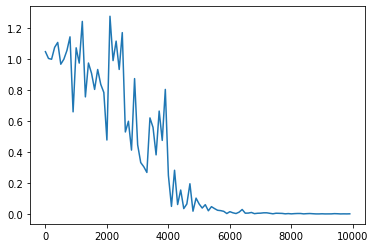

In [7]:
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
from common import functions
import matplotlib.pyplot as plt

# def d_tanh(x):



# データを用意
# 2進数の桁数
binary_dim = 8
# 最大値 + 1
largest_number = pow(2, binary_dim)
# largest_numberまで2進数を用意
binary = np.unpackbits(np.array([range(largest_number)],dtype=np.uint8).T,axis=1)

input_layer_size = 2
hidden_layer_size = 16
output_layer_size = 1

weight_init_std = 1
learning_rate = 0.1

iters_num = 10000
plot_interval = 100

# ウェイト初期化 (バイアスは簡単のため省略)
W_in = weight_init_std * np.random.randn(input_layer_size, hidden_layer_size)
W_out = weight_init_std * np.random.randn(hidden_layer_size, output_layer_size)
W = weight_init_std * np.random.randn(hidden_layer_size, hidden_layer_size)

# Xavier


# He
W_in = np.random.randn(input_layer_size, hidden_layer_size) / (np.sqrt(input_layer_size)) * np.sqrt(2)
W_out = np.random.randn(hidden_layer_size, output_layer_size) / (np.sqrt(hidden_layer_size)) * np.sqrt(2)
W = np.random.randn(hidden_layer_size, hidden_layer_size) / (np.sqrt(hidden_layer_size)) * np.sqrt(2)


# 勾配
W_in_grad = np.zeros_like(W_in)
W_out_grad = np.zeros_like(W_out)
W_grad = np.zeros_like(W)

u = np.zeros((hidden_layer_size, binary_dim + 1))
z = np.zeros((hidden_layer_size, binary_dim + 1))
y = np.zeros((output_layer_size, binary_dim))

delta_out = np.zeros((output_layer_size, binary_dim))
delta = np.zeros((hidden_layer_size, binary_dim + 1))

all_losses = []

for i in range(iters_num):
    
    # A, B初期化 (a + b = d)
    a_int = np.random.randint(largest_number/2)
    a_bin = binary[a_int] # binary encoding
    b_int = np.random.randint(largest_number/2)
    b_bin = binary[b_int] # binary encoding
    
    # 正解データ
    d_int = a_int + b_int
    d_bin = binary[d_int]
    
    # 出力バイナリ
    out_bin = np.zeros_like(d_bin)
    
    # 時系列全体の誤差
    all_loss = 0    
    
    # 時系列ループ
    for t in range(binary_dim):
        # 入力値
        X = np.array([a_bin[ - t - 1], b_bin[ - t - 1]]).reshape(1, -1)
        # 時刻tにおける正解データ
        dd = np.array([d_bin[binary_dim - t - 1]])
        
        u[:,t+1] = np.dot(X, W_in) + np.dot(z[:,t].reshape(1, -1), W)
        z[:,t+1] = functions.sigmoid(u[:,t+1])

        y[:,t] = functions.sigmoid(np.dot(z[:,t+1].reshape(1, -1), W_out))


        #誤差
        loss = functions.mean_squared_error(dd, y[:,t])
        
        delta_out[:,t] = functions.d_mean_squared_error(dd, y[:,t]) * functions.d_sigmoid(y[:,t])        
        
        all_loss += loss

        out_bin[binary_dim - t - 1] = np.round(y[:,t])
    
    
    for t in range(binary_dim)[::-1]:
        X = np.array([a_bin[-t-1],b_bin[-t-1]]).reshape(1, -1)        

        delta[:,t] = (np.dot(delta[:,t+1].T, W.T) + np.dot(delta_out[:,t].T, W_out.T)) * functions.d_sigmoid(u[:,t+1])

        # 勾配更新
        W_out_grad += np.dot(z[:,t+1].reshape(-1,1), delta_out[:,t].reshape(-1,1))
        W_grad += np.dot(z[:,t].reshape(-1,1), delta[:,t].reshape(1,-1))
        W_in_grad += np.dot(X.T, delta[:,t].reshape(1,-1))
    
    # 勾配適用
    W_in -= learning_rate * W_in_grad
    W_out -= learning_rate * W_out_grad
    W -= learning_rate * W_grad
    
    W_in_grad *= 0
    W_out_grad *= 0
    W_grad *= 0
    

    if(i % plot_interval == 0):
        all_losses.append(all_loss)        
        print("iters:" + str(i))
        print("Loss:" + str(all_loss))
        print("Pred:" + str(out_bin))
        print("True:" + str(d_bin))
        out_int = 0
        for index,x in enumerate(reversed(out_bin)):
            out_int += x * pow(2, index)
        print(str(a_int) + " + " + str(b_int) + " = " + str(out_int))
        print("------------")

lists = range(0, iters_num, plot_interval)
plt.plot(lists, all_losses, label="loss")
plt.show()

## [try] 中間層の活性化関数を変更してみよう
ReLU(勾配爆発を確認しよう)<br>

iters:0
Loss:1.33711261454113
Pred:[1 1 1 1 1 1 1 1]
True:[1 0 0 1 1 1 1 0]
58 + 100 = 255
------------
iters:100
Loss:1.0261049811330745
Pred:[0 1 0 0 1 1 0 0]
True:[0 1 1 1 1 0 1 1]
73 + 50 = 76
------------
iters:200
Loss:0.7452290729859152
Pred:[0 0 0 0 1 1 1 0]
True:[0 0 0 0 1 1 1 0]
14 + 0 = 14
------------


..\common\functions.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))


iters:300
Loss:0.9099203589462079
Pred:[0 1 1 0 0 1 1 0]
True:[0 1 0 1 0 1 1 1]
38 + 49 = 102
------------
iters:400
Loss:1.0172911855316351
Pred:[1 1 1 0 1 1 1 0]
True:[0 1 1 1 1 0 0 0]
69 + 51 = 238
------------
iters:500
Loss:0.9695402569946534
Pred:[1 1 1 1 0 1 1 1]
True:[0 1 1 0 1 1 0 1]
82 + 27 = 247
------------
iters:600
Loss:1.0280823855159715
Pred:[0 1 1 1 1 1 1 1]
True:[0 1 0 0 0 0 1 1]
56 + 11 = 127
------------
iters:700
Loss:0.867027718812577
Pred:[1 1 1 1 1 1 1 0]
True:[1 0 1 1 1 0 1 0]
90 + 96 = 254
------------
iters:800
Loss:0.909647056432554
Pred:[1 1 1 1 1 1 1 0]
True:[0 1 0 1 0 1 0 0]
22 + 62 = 254
------------
iters:900
Loss:1.0130045799832312
Pred:[1 1 1 1 0 1 1 0]
True:[0 1 0 1 1 1 0 1]
67 + 26 = 246
------------
iters:1000
Loss:1.0087473210470002
Pred:[1 0 0 0 1 1 1 0]
True:[0 1 1 0 1 0 1 0]
7 + 99 = 142
------------
iters:1100
Loss:0.9997405795831309
Pred:[1 1 1 0 0 0 1 0]
True:[1 0 1 1 0 1 0 0]
99 + 81 = 226
------------
iters:1200
Loss:0.9736025468972762
Pre

iters:8000
Loss:0.8801346732637219
Pred:[1 0 0 0 0 0 1 1]
True:[1 0 0 0 0 1 1 0]
29 + 105 = 131
------------
iters:8100
Loss:0.6818021910109964
Pred:[1 0 0 0 0 1 0 0]
True:[1 1 0 0 1 1 0 0]
114 + 90 = 132
------------
iters:8200
Loss:1.1050482354326134
Pred:[0 0 0 0 1 0 1 1]
True:[0 0 1 1 0 1 1 0]
33 + 21 = 11
------------
iters:8300
Loss:0.8865040558742435
Pred:[0 0 0 0 0 0 0 0]
True:[0 1 1 0 0 1 0 0]
36 + 64 = 0
------------
iters:8400
Loss:0.8641722634004408
Pred:[1 0 0 0 0 1 0 1]
True:[1 1 1 0 0 1 1 0]
115 + 115 = 133
------------
iters:8500
Loss:0.8644282410178238
Pred:[1 0 0 0 1 0 0 1]
True:[1 1 0 1 0 1 1 1]
118 + 97 = 137
------------
iters:8600
Loss:0.9195391323792825
Pred:[0 1 0 0 0 0 0 1]
True:[1 0 0 1 1 0 0 1]
38 + 115 = 65
------------
iters:8700
Loss:0.8933199580128968
Pred:[1 0 0 0 1 0 0 1]
True:[1 0 0 0 0 1 1 1]
115 + 20 = 137
------------
iters:8800
Loss:0.9130655876124717
Pred:[1 0 0 0 0 0 0 1]
True:[1 0 0 0 1 0 1 0]
91 + 47 = 129
------------
iters:8900
Loss:1.0066687

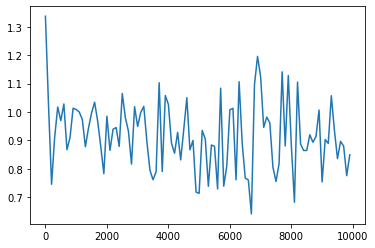

In [8]:
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
from common import functions
import matplotlib.pyplot as plt

# def d_tanh(x):



# データを用意
# 2進数の桁数
binary_dim = 8
# 最大値 + 1
largest_number = pow(2, binary_dim)
# largest_numberまで2進数を用意
binary = np.unpackbits(np.array([range(largest_number)],dtype=np.uint8).T,axis=1)

input_layer_size = 2
hidden_layer_size = 16
output_layer_size = 1

weight_init_std = 1
learning_rate = 0.1

iters_num = 10000
plot_interval = 100

# ウェイト初期化 (バイアスは簡単のため省略)
W_in = weight_init_std * np.random.randn(input_layer_size, hidden_layer_size)
W_out = weight_init_std * np.random.randn(hidden_layer_size, output_layer_size)
W = weight_init_std * np.random.randn(hidden_layer_size, hidden_layer_size)

# Xavier


# He
#W_in = np.random.randn(input_layer_size, hidden_layer_size) / (np.sqrt(input_layer_size)) * np.sqrt(2)
#W_out = np.random.randn(hidden_layer_size, output_layer_size) / (np.sqrt(hidden_layer_size)) * np.sqrt(2)
#W = np.random.randn(hidden_layer_size, hidden_layer_size) / (np.sqrt(hidden_layer_size)) * np.sqrt(2)


# 勾配
W_in_grad = np.zeros_like(W_in)
W_out_grad = np.zeros_like(W_out)
W_grad = np.zeros_like(W)

u = np.zeros((hidden_layer_size, binary_dim + 1))
z = np.zeros((hidden_layer_size, binary_dim + 1))
y = np.zeros((output_layer_size, binary_dim))

delta_out = np.zeros((output_layer_size, binary_dim))
delta = np.zeros((hidden_layer_size, binary_dim + 1))

all_losses = []

for i in range(iters_num):
    
    # A, B初期化 (a + b = d)
    a_int = np.random.randint(largest_number/2)
    a_bin = binary[a_int] # binary encoding
    b_int = np.random.randint(largest_number/2)
    b_bin = binary[b_int] # binary encoding
    
    # 正解データ
    d_int = a_int + b_int
    d_bin = binary[d_int]
    
    # 出力バイナリ
    out_bin = np.zeros_like(d_bin)
    
    # 時系列全体の誤差
    all_loss = 0    
    
    # 時系列ループ
    for t in range(binary_dim):
        # 入力値
        X = np.array([a_bin[ - t - 1], b_bin[ - t - 1]]).reshape(1, -1)
        # 時刻tにおける正解データ
        dd = np.array([d_bin[binary_dim - t - 1]])
        
        u[:,t+1] = np.dot(X, W_in) + np.dot(z[:,t].reshape(1, -1), W)
        z[:,t+1] = functions.sigmoid(u[:,t+1])

        y[:,t] = functions.sigmoid(np.dot(z[:,t+1].reshape(1, -1), W_out))


        #誤差
        loss = functions.mean_squared_error(dd, y[:,t])
        
        delta_out[:,t] = functions.d_mean_squared_error(dd, y[:,t]) * functions.d_sigmoid(y[:,t])        
        
        all_loss += loss

        out_bin[binary_dim - t - 1] = np.round(y[:,t])
    
    
    for t in range(binary_dim)[::-1]:
        X = np.array([a_bin[-t-1],b_bin[-t-1]]).reshape(1, -1)        

        #delta[:,t] = (np.dot(delta[:,t+1].T, W.T) + np.dot(delta_out[:,t].T, W_out.T)) * functions.d_sigmoid(u[:,t+1])
        delta[:,t] = (np.dot(delta[:,t+1].T, W.T) + np.dot(delta_out[:,t].T, W_out.T)) * functions.d_relu(u[:,t+1])

        # 勾配更新
        W_out_grad += np.dot(z[:,t+1].reshape(-1,1), delta_out[:,t].reshape(-1,1))
        W_grad += np.dot(z[:,t].reshape(-1,1), delta[:,t].reshape(1,-1))
        W_in_grad += np.dot(X.T, delta[:,t].reshape(1,-1))
    
    # 勾配適用
    W_in -= learning_rate * W_in_grad
    W_out -= learning_rate * W_out_grad
    W -= learning_rate * W_grad
    
    W_in_grad *= 0
    W_out_grad *= 0
    W_grad *= 0
    

    if(i % plot_interval == 0):
        all_losses.append(all_loss)        
        print("iters:" + str(i))
        print("Loss:" + str(all_loss))
        print("Pred:" + str(out_bin))
        print("True:" + str(d_bin))
        out_int = 0
        for index,x in enumerate(reversed(out_bin)):
            out_int += x * pow(2, index)
        print(str(a_int) + " + " + str(b_int) + " = " + str(out_int))
        print("------------")

lists = range(0, iters_num, plot_interval)
plt.plot(lists, all_losses, label="loss")
plt.show()

tanh(numpyにtanhが用意されている。導関数をd_tanhとして作成しよう)

In [9]:
def d_tanh(x):
    return 1/(np.cosh(x) ** 2)

iters:0
Loss:1.2102587296487257
Pred:[1 1 1 0 1 0 1 1]
True:[1 0 1 0 1 1 1 0]
77 + 97 = 235
------------
iters:100
Loss:1.0977032878125752
Pred:[0 0 0 1 0 0 0 1]
True:[1 0 0 1 1 0 1 0]
51 + 103 = 17
------------
iters:200
Loss:0.988778061132779
Pred:[1 1 1 0 0 0 0 1]
True:[0 1 0 1 1 0 1 1]
62 + 29 = 225
------------
iters:300
Loss:0.8532933223481156
Pred:[0 0 0 1 1 1 1 0]
True:[1 0 0 0 1 1 0 0]
84 + 56 = 30
------------
iters:400
Loss:0.6329072450031906
Pred:[0 0 1 0 0 1 0 0]
True:[0 0 1 1 0 1 0 0]
48 + 4 = 36
------------
iters:500
Loss:0.9556225149033958
Pred:[1 0 1 1 0 1 1 1]
True:[0 1 1 1 1 1 0 1]
120 + 5 = 183
------------
iters:600
Loss:1.2715549173532155
Pred:[0 0 0 1 0 0 0 0]
True:[0 1 1 1 1 1 1 1]
45 + 82 = 16
------------
iters:700
Loss:0.7383565235391348
Pred:[1 1 1 0 0 1 1 0]
True:[1 1 1 0 0 1 0 0]
126 + 102 = 230
------------
iters:800
Loss:1.0254366853242263
Pred:[0 0 1 0 0 0 1 1]
True:[0 0 1 1 1 1 0 0]
27 + 33 = 35
------------
iters:900
Loss:0.9308390750499889
Pred:[0 0

iters:7800
Loss:0.324044771254514
Pred:[0 1 0 1 0 1 1 1]
True:[0 1 1 1 0 1 1 1]
84 + 35 = 87
------------
iters:7900
Loss:0.8795038494283444
Pred:[1 1 1 1 1 0 1 0]
True:[1 0 0 0 0 0 1 0]
116 + 14 = 250
------------
iters:8000
Loss:0.717188779509742
Pred:[1 0 1 1 0 1 0 0]
True:[1 0 1 1 0 0 1 0]
79 + 99 = 180
------------
iters:8100
Loss:0.4353555444238164
Pred:[0 1 0 0 0 0 0 1]
True:[0 1 0 0 0 0 0 1]
53 + 12 = 65
------------
iters:8200
Loss:0.7372131856392257
Pred:[1 0 1 0 0 0 0 1]
True:[1 0 0 0 0 0 0 1]
94 + 35 = 161
------------
iters:8300
Loss:0.504420802562213
Pred:[0 1 0 0 1 1 1 0]
True:[0 1 1 0 1 1 1 0]
48 + 62 = 78
------------
iters:8400
Loss:0.6720779163268455
Pred:[0 0 1 0 0 1 1 1]
True:[0 0 0 1 1 0 1 1]
27 + 0 = 39
------------
iters:8500
Loss:0.8455912888554905
Pred:[1 0 0 0 0 0 0 0]
True:[1 1 0 0 0 1 0 0]
126 + 70 = 128
------------
iters:8600
Loss:1.1425773991769637
Pred:[0 1 0 1 0 1 0 0]
True:[0 0 1 0 1 1 0 0]
42 + 2 = 84
------------
iters:8700
Loss:0.5241613410686666
P

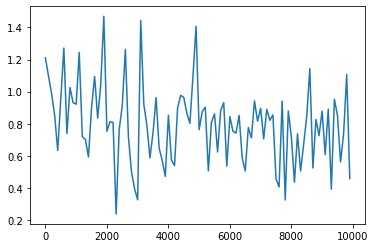

In [10]:
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
from common import functions
import matplotlib.pyplot as plt

# def d_tanh(x):



# データを用意
# 2進数の桁数
binary_dim = 8
# 最大値 + 1
largest_number = pow(2, binary_dim)
# largest_numberまで2進数を用意
binary = np.unpackbits(np.array([range(largest_number)],dtype=np.uint8).T,axis=1)

input_layer_size = 2
hidden_layer_size = 16
output_layer_size = 1

weight_init_std = 1
learning_rate = 0.1

iters_num = 10000
plot_interval = 100

# ウェイト初期化 (バイアスは簡単のため省略)
W_in = weight_init_std * np.random.randn(input_layer_size, hidden_layer_size)
W_out = weight_init_std * np.random.randn(hidden_layer_size, output_layer_size)
W = weight_init_std * np.random.randn(hidden_layer_size, hidden_layer_size)

# Xavier


# He
#W_in = np.random.randn(input_layer_size, hidden_layer_size) / (np.sqrt(input_layer_size)) * np.sqrt(2)
#W_out = np.random.randn(hidden_layer_size, output_layer_size) / (np.sqrt(hidden_layer_size)) * np.sqrt(2)
#W = np.random.randn(hidden_layer_size, hidden_layer_size) / (np.sqrt(hidden_layer_size)) * np.sqrt(2)


# 勾配
W_in_grad = np.zeros_like(W_in)
W_out_grad = np.zeros_like(W_out)
W_grad = np.zeros_like(W)

u = np.zeros((hidden_layer_size, binary_dim + 1))
z = np.zeros((hidden_layer_size, binary_dim + 1))
y = np.zeros((output_layer_size, binary_dim))

delta_out = np.zeros((output_layer_size, binary_dim))
delta = np.zeros((hidden_layer_size, binary_dim + 1))

all_losses = []

for i in range(iters_num):
    
    # A, B初期化 (a + b = d)
    a_int = np.random.randint(largest_number/2)
    a_bin = binary[a_int] # binary encoding
    b_int = np.random.randint(largest_number/2)
    b_bin = binary[b_int] # binary encoding
    
    # 正解データ
    d_int = a_int + b_int
    d_bin = binary[d_int]
    
    # 出力バイナリ
    out_bin = np.zeros_like(d_bin)
    
    # 時系列全体の誤差
    all_loss = 0    
    
    # 時系列ループ
    for t in range(binary_dim):
        # 入力値
        X = np.array([a_bin[ - t - 1], b_bin[ - t - 1]]).reshape(1, -1)
        # 時刻tにおける正解データ
        dd = np.array([d_bin[binary_dim - t - 1]])
        
        u[:,t+1] = np.dot(X, W_in) + np.dot(z[:,t].reshape(1, -1), W)
        z[:,t+1] = functions.sigmoid(u[:,t+1])

        y[:,t] = functions.sigmoid(np.dot(z[:,t+1].reshape(1, -1), W_out))


        #誤差
        loss = functions.mean_squared_error(dd, y[:,t])
        
        delta_out[:,t] = functions.d_mean_squared_error(dd, y[:,t]) * functions.d_sigmoid(y[:,t])        
        
        all_loss += loss

        out_bin[binary_dim - t - 1] = np.round(y[:,t])
    
    
    for t in range(binary_dim)[::-1]:
        X = np.array([a_bin[-t-1],b_bin[-t-1]]).reshape(1, -1)        

        #delta[:,t] = (np.dot(delta[:,t+1].T, W.T) + np.dot(delta_out[:,t].T, W_out.T)) * functions.d_sigmoid(u[:,t+1])
        delta[:,t] = (np.dot(delta[:,t+1].T, W.T) + np.dot(delta_out[:,t].T, W_out.T)) * d_tanh(u[:,t+1]) 

        # 勾配更新
        W_out_grad += np.dot(z[:,t+1].reshape(-1,1), delta_out[:,t].reshape(-1,1))
        W_grad += np.dot(z[:,t].reshape(-1,1), delta[:,t].reshape(1,-1))
        W_in_grad += np.dot(X.T, delta[:,t].reshape(1,-1))
    
    # 勾配適用
    W_in -= learning_rate * W_in_grad
    W_out -= learning_rate * W_out_grad
    W -= learning_rate * W_grad
    
    W_in_grad *= 0
    W_out_grad *= 0
    W_grad *= 0
    

    if(i % plot_interval == 0):
        all_losses.append(all_loss)        
        print("iters:" + str(i))
        print("Loss:" + str(all_loss))
        print("Pred:" + str(out_bin))
        print("True:" + str(d_bin))
        out_int = 0
        for index,x in enumerate(reversed(out_bin)):
            out_int += x * pow(2, index)
        print(str(a_int) + " + " + str(b_int) + " = " + str(out_int))
        print("------------")

lists = range(0, iters_num, plot_interval)
plt.plot(lists, all_losses, label="loss")
plt.show()

# 考察

単純なバイナリ加算のロジックをRNNによる教師あり学習で実現できることが理解できた。

## weight_init_stdやlearning_rate, hidden_layer_sizeを変更

`weight_init_std`については、当初の値から減少・増加した値で検証したが、当初の値（１）が最もよい結果が出た。

`learning_rate`, については、予想通り、当初の値から増加した場合、よりはやくLossが減少するのが確認できた。

`hidden_layer_size`については、単純にレイヤーを増やしたからと言って、良い結果にはならないことが分かった。

## 重みの初期化方法を変更

重みの初期化については、乱数による初期化が最も良い結果となっているようだ。XavierやHeでも最終的にはLossの減少が確認できた。

## 中間層の活性化関数を変更

中間層の活性化関数をsigmoidからReLUやtanhに変更したケースでは、最終的に収束しなかった（勾配爆発）。